1)	Machine Learning. (Ideally use a jupyter notebook). Tips: Beating the RMSE is one criteria but more points are given to describe the logic and process to obtain it. 

* a)	Download **train.csv** and **test.csv** from here https://goo.gl/do3PJY 
* b)	Perform simple Exploratory Data Analysis on **train.csv** and **test.csv**
* c)	Use a suitable algorithm to train a machine learning model from the **train.csv**
* d)	Interpret the model by showing its metrics.
* e)	**Test.csv** contains extrapolated data. Use the trained model to infer/predict the y values in **test.csv**. You may use y_hat as the predicted values column and retain the original y column to be used to complete the next step.
* f)	Write down your train and test RMSE. You may attempt to improve your RMSE to as low as possible by experimenting with different ML algorithms or techniques, you may retain all the codes used to test different models and only pick the best result. For reference the base RMSE of **test data** is 25.36 and average is 15.99 and lowest recorded is 0.24


**a) Download train.csv and test.csv from here https://goo.gl/do3PJY**

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# read the data provided
train = pd.read_csv("../input/involve-asia-assessment-dataset/train.csv", index_col = 0)
test = pd.read_csv("../input/involve-asia-assessment-dataset/test.csv", index_col = 0)

# check on the training data
train.head()

,x1,x2,y
index,,,
0,1.543500,0.718659,2.504393
1,1.721699,1.761218,16.777724
2,1.029734,0.946516,2.898218
3,1.874671,1.921898,21.753827
4,1.914601,1.017112,6.222516


**b) Perform simple Exploratory Data Analysis on train.csv and test.csv**

In [2]:
# check on the data types and missing values in training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      9999 non-null   float64
 1   x2      9999 non-null   float64
 2   y       9999 non-null   float64
dtypes: float64(3)
memory usage: 312.5 KB


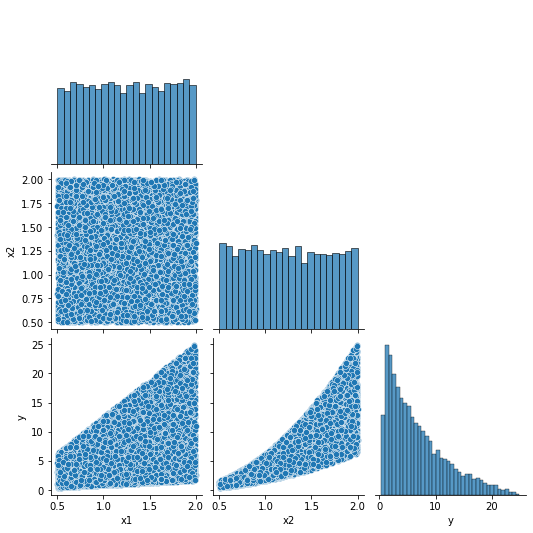

In [3]:
# inspect the relationship between the columns using pairplot
sb.pairplot(data = train, corner = True)

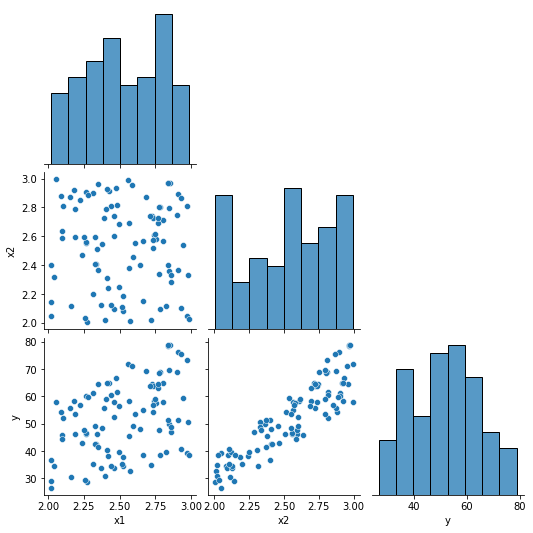

In [4]:
sb.pairplot(data = test, corner = True)

<AxesSubplot:>

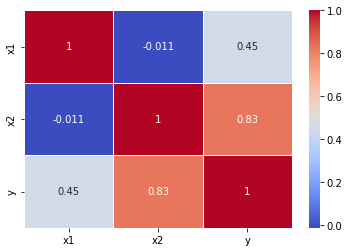

In [5]:
# determine the Pearson's correlation between the columns
sb.heatmap(train.corr(), cmap = "coolwarm", linewidths = 0.5, annot = True)

Observation:
* Both feature *x1* and *x2* and the target *y* are numerical with *float* type.
* This questions is a regression problem with 2 features.
* No missing value is present in both datasets.
* From pairplot and correlation heatmap, feature *x1* and *x2* do not have clear relationship (uncorrelated).
* From pairplot, the range of target *y* increases as the value for *x1* or *x2* increases.
* From correlation heatmap, *x2* exihibit stronger linear relationship to *y* compared to *x1*, indicating the significance of *x2* (observable through pairplot as well).

**c) Use a suitable algorithm to train a machine learning model from the train.csv**

In [6]:
# separating the features and target in both train and test dataset
X = train.copy()
y = X.pop("y")
X_test = test.copy()
y_test = X_test.pop("y")


# obtain validation dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.2,random_state = 0) # random_state defined to ensure repeatability

Trial 1: Linear Regression

In [7]:
# try with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# define the ML model
lreg_model = LinearRegression()
# train the ML model
lreg_model.fit(X_train, y_train)

# Evaluation on Validation Dataset
# apply the trained ML model for prediction
y_pred = lreg_model.predict(X_valid)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse_val = np.sqrt(mean_squared_error(y_valid,y_pred))
print("Linear Regression: ")
print("RMSE (Validation): " + str(rmse_val))

# Evaluation on Test Dataset
# apply the trained ML model for prediction
y_hat = lreg_model.predict(X_test)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
print("RMSE (Test): " + str(rmse))

Linear Regression: 
RMSE (Validation): 1.6147104684110636
RMSE (Test): 27.19577783921725


Trial 2: XGBoost

In [8]:
from xgboost import XGBRegressor

# define the ML model
XGB_model = XGBRegressor()
# train the ML model
XGB_model.fit(X_train, y_train)

# apply the trained ML model for prediction
y_pred = XGB_model.predict(X_valid)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse_val = np.sqrt(mean_squared_error(y_valid,y_pred))
print("XGBoost: ")
print("RMSE (Validation): " + str(rmse_val))

# Evaluation on Test Dataset
# apply the trained ML model for prediction
y_hat = XGB_model.predict(X_test)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
print("RMSE (Test): " + str(rmse))


XGBoost: 
RMSE (Validation): 0.11010390953643519
RMSE (Test): 30.09711140519795


Trial 3: Support Vector Regressor

In [9]:
from sklearn.svm import SVR

# define the ML model
SVR_model = SVR()
# train the ML model
SVR_model.fit(X_train, y_train)

# apply the trained ML model for prediction
y_pred = SVR_model.predict(X_valid)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse_val = np.sqrt(mean_squared_error(y_valid,y_pred))
print("SVR: ")
print("RMSE (Validation): " + str(rmse_val))

# Evaluation on Test Dataset
# apply the trained ML model for prediction
y_hat = SVR_model.predict(X_test)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
print("RMSE (Test): " + str(rmse))

SVR: 
RMSE (Validation): 0.06693910080364353
RMSE (Test): 42.18880802844454


Trial 4: Polynomial Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
poly_model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_model.fit(X_train, y_train)

# apply the trained ML model for prediction
y_pred = poly_model.predict(X_valid)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse_val = np.sqrt(mean_squared_error(y_valid,y_pred))
print("Polynomial Regression: ")
print("RMSE (Validation): " + str(rmse_val))

# Evaluation on Test Dataset
# apply the trained ML model for prediction
y_hat = poly_model.predict(X_test)
# performance evaluation of the molde using root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
print("RMSE (Test): " + str(rmse))

Polynomial Regression: 
RMSE (Validation): 0.23047756054460325
RMSE (Test): 7.052957951437866


List of Supervised ML models: https://towardsdatascience.com/overview-of-supervised-machine-learning-algorithms-a5107d036296